In [2]:
import pandas as pd
#import seaborn as sns
#import matplotlib.pyplot as plt
import numpy as np
import statistics as st
import itertools
import time

In [3]:
dfc=pd.read_csv('output.csv', header=0)

In [9]:
dfw=pd.read_csv('PRISM_Rain_Temp.csv', header=10)

In [22]:
dfw["date"]=dfw["Date"].apply(lambda x: pd.to_datetime(x, format='%Y-%m-%d'))

In [26]:
dfc["date"] = pd.to_datetime(dfc["Date"])


In [32]:
dfw.dtypes

Date                          object
ppt (inches)                 float64
tmean (degrees F)            float64
tdmean (degrees F)           float64
date                  datetime64[ns]
dtype: object

In [33]:
dfc.dtypes

Offense ID                         int64
Offense Start DateTime            object
Offense Parent Group              object
Offense                           object
Precinct                          object
MCPP                              object
year                               int64
Longitude                        float64
Latitude                         float64
Start                             object
date                      datetime64[ns]
Date                      datetime64[ns]
dtype: object

In [27]:
dfc.head()

,Offense ID,Offense Start DateTime,Offense Parent Group,Offense,Precinct,MCPP,year,Longitude,Latitude,Start,date,Date
0,12605873663,02/05/2020 10:10:00 AM,DRUG/NARCOTIC OFFENSES,Drug/Narcotic Violations,W,MAGNOLIA,2020,-122.385974,47.649387,02/05/2020 10:10:00 AM,2020-02-05 10:10:00,2020-02-05 10:10:00
1,12605598696,02/03/2020 08:00:00 AM,LARCENY-THEFT,Theft of Motor Vehicle Parts or Accessories,N,ROOSEVELT/RAVENNA,2020,-122.323399,47.675118,02/03/2020 08:00:00 AM,2020-02-03 08:00:00,2020-02-03 08:00:00
2,12605567653,02/02/2020 08:30:00 PM,ROBBERY,Robbery,N,ROOSEVELT/RAVENNA,2020,-122.299552,47.666384,02/02/2020 08:30:00 PM,2020-02-02 20:30:00,2020-02-02 20:30:00
3,12605174036,02/05/2020 01:17:00 AM,DESTRUCTION/DAMAGE/VANDALISM OF PROPERTY,Destruction/Damage/Vandalism of Property,W,MAGNOLIA,2020,-122.384865,47.642927,02/05/2020 01:17:00 AM,2020-02-05 01:17:00,2020-02-05 01:17:00
4,12605081469,02/05/2020 12:51:21 AM,DRIVING UNDER THE INFLUENCE,Driving Under the Influence,N,BALLARD SOUTH,2020,-122.366195,47.662193,02/05/2020 12:51:21 AM,2020-02-05 00:51:21,2020-02-05 00:51:21


In [15]:
dfw.head()

,Date,ppt (inches),tmean (degrees F),tdmean (degrees F),date
0,2008-01-01,0.02,38.1,30.3,2008-01-01 00:01:00
1,2008-01-02,0.25,40.0,27.9,2008-01-02 00:01:00
2,2008-01-03,0.37,39.5,37.8,2008-01-03 00:01:00
3,2008-01-04,0.34,45.0,38.8,2008-01-04 00:01:00
4,2008-01-05,0.21,46.3,37.7,2008-01-05 00:01:00


In [42]:
dfc["datetime"]=dfc["date"]
dfw["datetime"]=dfw["date"]
dfw["date"]=dfw["datetime"].dt.date
dfc["date"]=dfc["datetime"].dt.date

In [43]:
result = dfc.join(dfw.set_index('date'), on='date', lsuffix='_left', rsuffix='_right')

In [44]:
result.head(10)

,Offense ID,Offense Start DateTime,Offense Parent Group,Offense,Precinct,MCPP,year,Longitude,Latitude,Start,date,Date_left,datetime_left,Date_right,ppt (inches),tmean (degrees F),tdmean (degrees F),datetime_right
0,12605873663,02/05/2020 10:10:00 AM,DRUG/NARCOTIC OFFENSES,Drug/Narcotic Violations,W,MAGNOLIA,2020,-122.385974,47.649387,02/05/2020 10:10:00 AM,2020-02-05,2020-02-05 10:10:00,2020-02-05 10:10:00,2020-02-05,1.44,34.9,33.8,2020-02-05
1,12605598696,02/03/2020 08:00:00 AM,LARCENY-THEFT,Theft of Motor Vehicle Parts or Accessories,N,ROOSEVELT/RAVENNA,2020,-122.323399,47.675118,02/03/2020 08:00:00 AM,2020-02-03,2020-02-03 08:00:00,2020-02-03 08:00:00,2020-02-03,0.24,36.8,31.1,2020-02-03
2,12605567653,02/02/2020 08:30:00 PM,ROBBERY,Robbery,N,ROOSEVELT/RAVENNA,2020,-122.299552,47.666384,02/02/2020 08:30:00 PM,2020-02-02,2020-02-02 20:30:00,2020-02-02 20:30:00,2020-02-02,0.53,43.2,38.0,2020-02-02
3,12605174036,02/05/2020 01:17:00 AM,DESTRUCTION/DAMAGE/VANDALISM OF PROPERTY,Destruction/Damage/Vandalism of Property,W,MAGNOLIA,2020,-122.384865,47.642927,02/05/2020 01:17:00 AM,2020-02-05,2020-02-05 01:17:00,2020-02-05 01:17:00,2020-02-05,1.44,34.9,33.8,2020-02-05
4,12605081469,02/05/2020 12:51:21 AM,DRIVING UNDER THE INFLUENCE,Driving Under the Influence,N,BALLARD SOUTH,2020,-122.366195,47.662193,02/05/2020 12:51:21 AM,2020-02-05,2020-02-05 00:51:21,2020-02-05 00:51:21,2020-02-05,1.44,34.9,33.8,2020-02-05
5,12605077150,02/04/2020 10:59:00 PM,LARCENY-THEFT,Shoplifting,W,DOWNTOWN COMMERCIAL,2020,-122.338450,47.608789,02/04/2020 10:59:00 PM,2020-02-04,2020-02-04 22:59:00,2020-02-04 22:59:00,2020-02-04,0.09,35.0,30.3,2020-02-04
6,12605029468,02/04/2020 08:30:00 PM,DESTRUCTION/DAMAGE/VANDALISM OF PROPERTY,Destruction/Damage/Vandalism of Property,N,PHINNEY RIDGE,2020,-122.355309,47.680527,02/04/2020 08:30:00 PM,2020-02-04,2020-02-04 20:30:00,2020-02-04 20:30:00,2020-02-04,0.09,35.0,30.3,2020-02-04
7,12604995759,02/04/2020 07:58:00 PM,LARCENY-THEFT,Shoplifting,SW,ROXHILL/WESTWOOD/ARBOR HEIGHTS,2020,-122.367312,47.521028,02/04/2020 07:58:00 PM,2020-02-04,2020-02-04 19:58:00,2020-02-04 19:58:00,2020-02-04,0.09,35.0,30.3,2020-02-04
8,12604963106,02/04/2020 07:01:00 PM,DRIVING UNDER THE INFLUENCE,Driving Under the Influence,N,NORTHGATE,2020,-122.312078,47.697616,02/04/2020 07:01:00 PM,2020-02-04,2020-02-04 19:01:00,2020-02-04 19:01:00,2020-02-04,0.09,35.0,30.3,2020-02-04
9,12605008517,02/04/2020 09:00:00 PM,LARCENY-THEFT,Theft From Motor Vehicle,E,CAPITOL HILL,2020,-122.316845,47.614684,02/04/2020 09:00:00 PM,2020-02-04,2020-02-04 21:00:00,2020-02-04 21:00:00,2020-02-04,0.09,35.0,30.3,2020-02-04


In [46]:
pip install seaborn

   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   ------------------------------------- - 286.7/294.9 kB 18.4 MB/s eta 0:00:01
   ---------------------------------------- 294.9/294.9 kB 6.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [45]:
pip install matplotlib


     ---------------------------------------- 0.0/165.9 kB ? eta -:--:--
     -------------------------------------- 165.9/165.9 kB 5.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
   ------ --------------------------------- 1.3/8.0 MB 28.3 MB/s eta 0:00:01
   ------------ --------------------------- 2.5/8.0 MB 26.6 MB/s eta 0:00:01
   ------------------- -------------------- 3.9/8.0 MB 28.0 MB/s eta 0:00:01
   ------------------------ --------------- 5.0/8.0 MB 26.6 MB/s eta 0:00:01
   -------------------------------- ------- 6.4/8.0 MB 27.5 MB/s eta 0:00:01
   ---------------------------------------  7.8/8.0 MB 27.8 MB/s eta 0:00:01
   ---------------------------------------  8.0/8.0 MB 26.9 MB/s eta 0:00:01
   ---------------------------------------- 8.0/8.0 MB 24.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/189.9 kB ? eta -:--:--
   ---------------------------------------- 189.9/189.9 kB 5.8 MB/s eta 0:00:00
   -------

In [47]:
result.set_index('date', inplace=True)


In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

ValueError: cannot reindex on an axis with duplicate labels

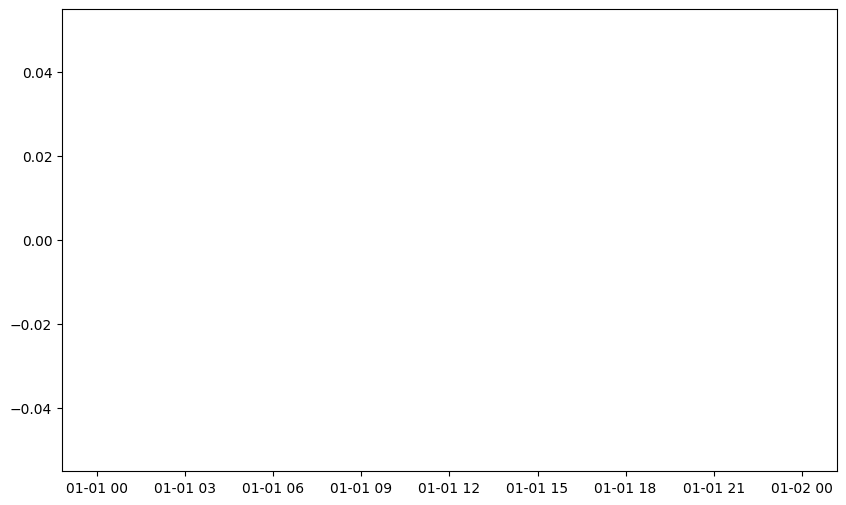

In [53]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=result, x='date', y='ppt (inches)')
plt.xlabel('Date')
plt.ylabel('Precipitation')
plt.title('Time Series Plot')
plt.show()

(array([7.25729e+05, 9.26940e+04, 3.88180e+04, 1.41810e+04, 4.08300e+03,
        1.75900e+03, 9.07000e+02, 7.28000e+02, 1.89000e+02, 3.60000e+02]),
 array([0.   , 0.387, 0.774, 1.161, 1.548, 1.935, 2.322, 2.709, 3.096,
        3.483, 3.87 ]),
 <BarContainer object of 10 artists>)

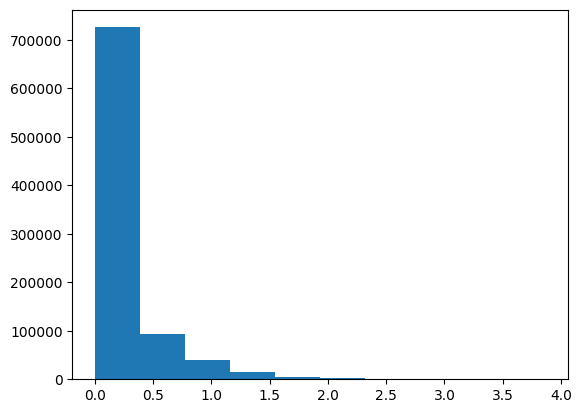

In [70]:
plt.hist(result['ppt (inches)'], bins=10)

(array([3.912e+03, 5.030e+02, 2.140e+02, 7.600e+01, 2.300e+01, 1.000e+01,
        5.000e+00, 4.000e+00, 1.000e+00, 2.000e+00]),
 array([0.   , 0.387, 0.774, 1.161, 1.548, 1.935, 2.322, 2.709, 3.096,
        3.483, 3.87 ]),
 <BarContainer object of 10 artists>)

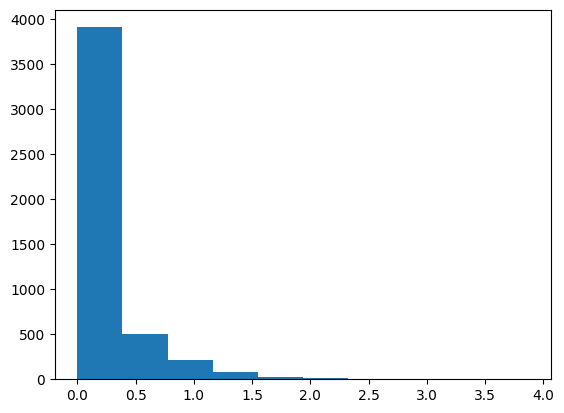

In [72]:
plt.hist(dfw["ppt (inches)"])

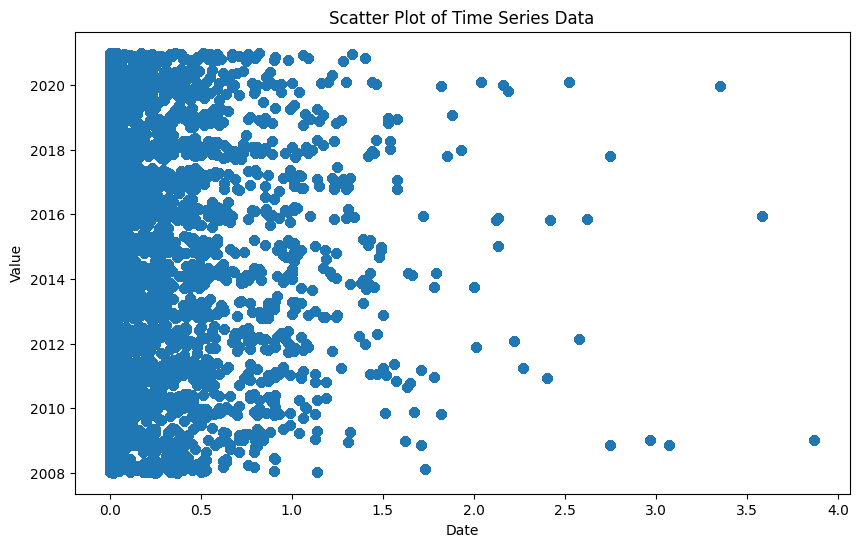

In [74]:
plt.figure(figsize=(10, 6))
plt.scatter( result['ppt (inches)'],result['Date_right'])
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Scatter Plot of Time Series Data')
plt.show()

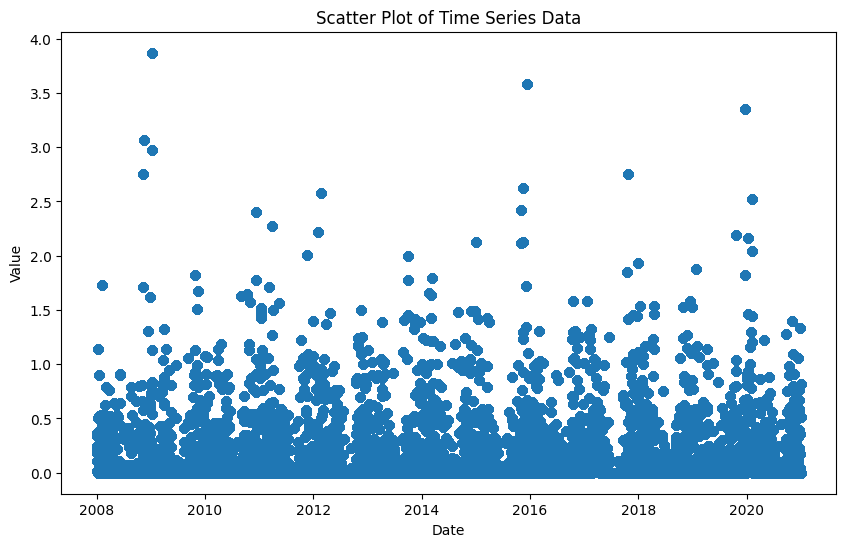

In [68]:
plt.figure(figsize=(10, 6))
plt.scatter(result['Date_right'], result['ppt (inches)'])
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Scatter Plot of Time Series Data')
plt.show()

In [62]:
result["Date_right"]=pd.to_datetime(result["Date_right"]).dt.date

In [64]:
result["Date_right"]=pd.to_datetime(result["Date_right"])

In [66]:
result.head()

,Offense ID,Offense Start DateTime,Offense Parent Group,Offense,Precinct,MCPP,year,Longitude,Latitude,Start,Date_left,datetime_left,Date_right,ppt (inches),tmean (degrees F),tdmean (degrees F),datetime_right
date,,,,,,,,,,,,,,,,,
2020-02-05,12605873663,02/05/2020 10:10:00 AM,DRUG/NARCOTIC OFFENSES,Drug/Narcotic Violations,W,MAGNOLIA,2020,-122.385974,47.649387,02/05/2020 10:10:00 AM,2020-02-05 10:10:00,2020-02-05 10:10:00,2020-02-05,1.44,34.9,33.8,2020-02-05
2020-02-03,12605598696,02/03/2020 08:00:00 AM,LARCENY-THEFT,Theft of Motor Vehicle Parts or Accessories,N,ROOSEVELT/RAVENNA,2020,-122.323399,47.675118,02/03/2020 08:00:00 AM,2020-02-03 08:00:00,2020-02-03 08:00:00,2020-02-03,0.24,36.8,31.1,2020-02-03
2020-02-02,12605567653,02/02/2020 08:30:00 PM,ROBBERY,Robbery,N,ROOSEVELT/RAVENNA,2020,-122.299552,47.666384,02/02/2020 08:30:00 PM,2020-02-02 20:30:00,2020-02-02 20:30:00,2020-02-02,0.53,43.2,38.0,2020-02-02
2020-02-05,12605174036,02/05/2020 01:17:00 AM,DESTRUCTION/DAMAGE/VANDALISM OF PROPERTY,Destruction/Damage/Vandalism of Property,W,MAGNOLIA,2020,-122.384865,47.642927,02/05/2020 01:17:00 AM,2020-02-05 01:17:00,2020-02-05 01:17:00,2020-02-05,1.44,34.9,33.8,2020-02-05
2020-02-05,12605081469,02/05/2020 12:51:21 AM,DRIVING UNDER THE INFLUENCE,Driving Under the Influence,N,BALLARD SOUTH,2020,-122.366195,47.662193,02/05/2020 12:51:21 AM,2020-02-05 00:51:21,2020-02-05 00:51:21,2020-02-05,1.44,34.9,33.8,2020-02-05


In [67]:
print(result.dtypes)


Offense ID                         int64
Offense Start DateTime            object
Offense Parent Group              object
Offense                           object
Precinct                          object
MCPP                              object
year                               int64
Longitude                        float64
Latitude                         float64
Start                             object
Date_left                 datetime64[ns]
datetime_left             datetime64[ns]
Date_right                datetime64[ns]
ppt (inches)                     float64
tmean (degrees F)                float64
tdmean (degrees F)               float64
datetime_right                    object
dtype: object
